In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import acquire_cindy as a
import acquire as acq
import prepare_cindy as prep

# Acquire

we are using the function in acquire.py to get a repo.

**Note : the repo name should not contain spaces**

I was working with a small size data to create prepare and explore

In [2]:
# repo_json_file = 'data2.json'
# df_github = pd.read_json(repo_json_file)

In [3]:
# df_github

In [4]:
#  df_github.to_csv('df.csv')

In [5]:
#df = pd.read_csv('df.csv', index_col=0)

In [6]:
# df

# acquire big data

In [7]:
 repo_json_file = 'data2.json'
 df_github = pd.read_json(repo_json_file)

In [8]:
df_github.head()

repo language  \
0                      jtleek/datasharing     None   
1           rdpeng/ProgrammingAssignment2        R   
2                     octocat/Spoon-Knife     HTML   
3                   tensorflow/tensorflow      C++   
4  SmartThingsCommunity/SmartThingsPublic   Groovy   

                                     readme_contents  
0  How to share data with a statistician\n=======...  
1  ### Introduction\n\nThis second programming as...  
2  ### Well hello there!\n\nThis repository is me...  
3  <div align="center">\n  <img src="https://www....  
4  # SmartThings Public GitHub Repo\n\nAn officia...

In [9]:
df_github.shape

(170, 3)

In [10]:
df_github.to_csv('git_urls.csv')

In [11]:
df = pd.read_csv('git_urls.csv', index_col=0)

In [12]:
df.shape

(170, 3)

# Prepare

in this section we are going to clean data:
- detect english language so we can have only information in english language (remove rows)
- check missing values. remove rows
- use my function that clean, steem
- remove al the programmin language that have observation ==1 (split error)
- in exploration IO realize that jupyter notebook was under language and it should be pyton

## detect language

In [ ]:
df.readme_contents[0]

install :
```
$ pip install -U textblob
$ python -m textblob.download_corpora
```
https://textblob.readthedocs.io/en/dev/install.html

In [ ]:
from textblob import TextBlob
text = df.readme_contents[0]
lang = TextBlob(text)
print(lang.detect_language())


In [ ]:
lang.detect_language()

In [ ]:
df

In [ ]:
# for n in range (0, len(df)):
#     text = df.readme_contents[n]
#     lang = TextBlob(text)
#     print(lang.detect_language())
#     if lang.detect_language() != 'en':
#         df =df.drop([n])
    

In [ ]:
df

In [ ]:
#create a function
def remove_nonenglish (df):
    '''
    takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    '''
    for n in range (0, len(df)):
        text = df.readme_contents[n]
        lang = TextBlob(text)
        print(lang.detect_language())
        if lang.detect_language() != 'en':
            df =df.drop([n])
    return df

In [ ]:
df = remove_nonenglish(df)

In [ ]:
df

### missing values

In [ ]:
#check missing values using my function
miss_val =prep.miss_dup_values(df)
miss_val

**Note:  we can see we have missing values in language , so I'm going to remove the rows that have missing values in language**

In [ ]:
#removing missing values
df = df.dropna(axis=0).reset_index(drop=True)

### clean, tokenized, stemming, lemmatize

In [ ]:
#use my prepare function
df =prep.prepare_data(df, 'readme_contents')

In [ ]:
df.head()

___________

when I tried to  split into train, validate , test,  I got this Error:
ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

I'm going to remove the records that have unique language

In [ ]:
def remove_lang (df):
    '''
    takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    '''
    #create a df with the unique languages
    targ =pd.DataFrame(df[['language']].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':'language'})
    #get the list of the unique languiages
    lang2drop= list(targ.language[targ.cnt ==1].values)
    for n in range (0, len(df)):
        if df.language[n] in lang2drop:
            df =df.drop([n])
    return df.reset_index(drop = True)

In [ ]:
df.language.value_counts()

In [ ]:
# change jupyter notebook to python

In [ ]:
df['language'].replace('Jupyter Notebook', 'Python', inplace=True )

In [ ]:
df.language.value_counts()

## MAIN FUNCTION FOR PREPARE

In [ ]:
def prepare_mf (df):
    '''
    takes in a df and all the rows with missing information, non English text,
    and then clean, tokenize, stemming, lemmatize
    '''
    #removing missing values
    df = df.dropna(axis=0).reset_index(drop=True)
    #removing texts that are not English
    df = remove_nonenglish(df)

    #use my prepare function to  clean, tokenized, stemming, lemmatize
    df =prepare_data(df, 'readme_contents')

    #remove the rows with unique languages because we cannot use them when we split
    df = remove_lang (df)
    
    #replace Jupyter notebook by python
    df['language'].replace('Jupyter Notebook', 'Python', inplace=True )
    return df
    
    
    

In [13]:
df.shape

(170, 3)

In [14]:
#prepare data
df =prep.prepare_mf(df)

In [15]:
df.shape

(125, 6)

In [16]:
df.language.value_counts()

JavaScript    30
Python        25
Java          13
C++            9
TypeScript     8
HTML           7
Go             7
Ruby           6
C              5
Shell          4
Vue            3
Kotlin         3
PHP            3
CSS            2
Name: language, dtype: int64

In [17]:
#split train, validate and test
train, validate, test = prep.split_data(df, 'language')

complete df -> (125, 6)
train -> (70, 6)
validate -> (30, 6)
test -> (25, 6)


_____________

# Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?


### - What are the most common words in READMEs?

In [18]:
train.language.value_counts()

JavaScript    17
Python        14
Java           8
C++            5
Ruby           4
HTML           4
Go             4
TypeScript     4
C              3
Vue            2
Shell          2
CSS            1
PHP            1
Kotlin         1
Name: language, dtype: int64

In [19]:
#get the list of languages
list_lang = list(train.language.value_counts().index)

In [20]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = prep.basic_clean(' '.join(train[train.language == language].lemmatized))

#add allwords
join_text['all_words']= prep.basic_clean(' '.join(train.lemmatized))



In [21]:
#check if we have all the languages
join_text.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'Ruby', 'HTML', 'Go', 'TypeScript', 'C', 'Vue', 'Shell', 'CSS', 'PHP', 'Kotlin', 'all_words'])

In [22]:
#join_text['Ruby']

In [23]:
pd.Series(join_text['Ruby'].split()).value_counts()

swot              17
university        13
targetblankimg    11
swotisacademic    11
jekyll            10
                  ..
customize          1
long               1
leeleerillynet     1
software           1
saskatchewan       1
Length: 497, dtype: int64

**Represent text as word frequencies.**

In [24]:
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [25]:
word_counts.sort_values('all_words', ascending=False).head(30)

JavaScript  Python  Java  C++  Ruby  HTML  Go  TypeScript  C  \
apikey                2     341     0    0     0     0   0           0  0   
1                   176     113     2    0     0     3   6          14  0   
use                 122      63    17    3     5    26  21          17  3   
const               265       0     0    0     0     0   0           1  0   
data                 31     203     3    2     0     2  12           0  0   
code                 73      82    12   14     5     6  18          11  3   
api                  15     208     2    0     1     0   5           1  0   
function            223       2     0    0     0     0   0           0  0   
file                 62      42    14    3     1    39  22          21  3   
javascript          208       2     0    1     0     8   2           0  0   
bad                 201       5     0    0     0     0   0           0  0   
project              45      35    20   14     3    11  13          26  3   
good                186       5     3    0     2     0   0           0  2   
img                  90      37    23    0     0     0   1          12  0   
using                47      73    15    2     2    12  15           7  1   
see                  38      53    12    9     9    16  16           6  3   
open                 32      89     6    6     3     0   2           5  2   
page                 17      16     4    2     1    51   4           0  1   
run                  31      40    20    4     0     0  23          27  0   
test                 49      24     2   28     1     0  25          28  0   
build                43      24    31   10     4     2   8          20  2   
install              45      44     3    5     4     0   4          23  4   
2                    89      28     4    4     0     1   3           5  1   
make                 45      43     1    2     1     2  18          10  2   
also                 36      37     7    3     1    10  31           4  3   
p                    31      73     3    0     0     0   5          12  0   
return              124       9     2    0     0     0   0           0  0   
version              46      39     9    7     1     0  15          10  2   
aligncenter          78      39     3    0     0     0   0           6  0   
image                11     105     0    0     0     9   4           0  0   

             Vue  Shell  CSS  PHP  Kotlin  all_words  
apikey         0      0    0    0       0        343  
1              2      1    4    0       0        321  
use            6      9    4    0       1        297  
const          1      0    0    0       0        267  
data           5      0    0    0       5        263  
code           4      3    2    2       0        235  
api            1      0    0    0       0        233  
function       4      1    0    0       0        230  
file           6      8    4    0       4        229  
javascript     0      0    0    1       0        222  
bad            0      0    0    0       0        206  
project       27      2    2    1       4        206  
good           3      1    0    0       0        202  
img           28      0    0    0       2        193  
using          0      2    5    0       3        184  
see            0      9    0    0       5        176  
open           4      8    2    0       4        163  
page          60      1    5    0       0        162  
run           10      4    1    0       1        161  
test           0      1    0    0       2        160  
build          3      0    3    0       0        150  
install        2     13    3    0       0        150  
2              5      1    4    0       0        145  
make           7      3    6    0       0        140  
also           0      5    0    0       0        137  
p              7      1    0    3       2        137  
return         0      0    0    0       0        135  
version        1      1    1    0       1        133  
aligncenter    3      0    0  

In [26]:
word_counts.shape

(4522, 15)

In [27]:
#vizualizacion most frequet words
def word_cloud (text):

    plt.figure(figsize=(10,10))
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

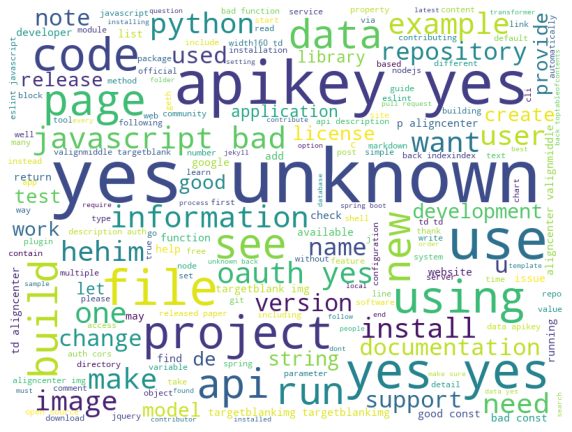

In [28]:
word_cloud(join_text['all_words'])

In [29]:
#what if I do only 30 words?
top_all =word_counts.sort_values('all_words', ascending=False)[['all_words']].head(30)

In [30]:
top_all

all_words
apikey             343
1                  321
use                297
const              267
data               263
code               235
api                233
function           230
file               229
javascript         222
bad                206
project            206
good               202
img                193
using              184
see                176
open               163
page               162
run                161
test               160
build              150
install            150
2                  145
make               140
also               137
p                  137
return             135
version            133
aligncenter        131
image              131

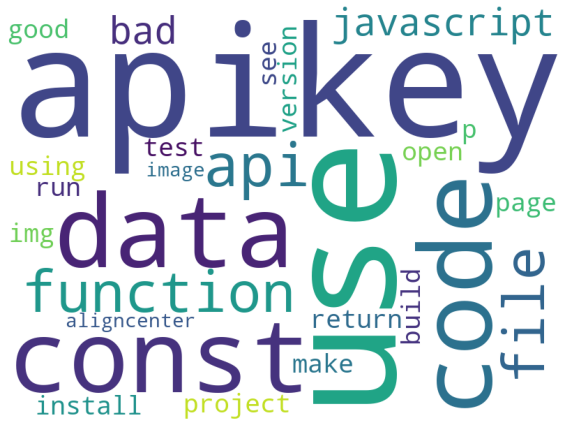

In [31]:
word_cloud(' '.join(top_all.index))

In [32]:
def wordcloud_top(df,column, n_top=30):
    top_all =df.sort_values(column, ascending=False)[[column]].head(n_top)
    word_cloud(' '.join(top_all.index))
    

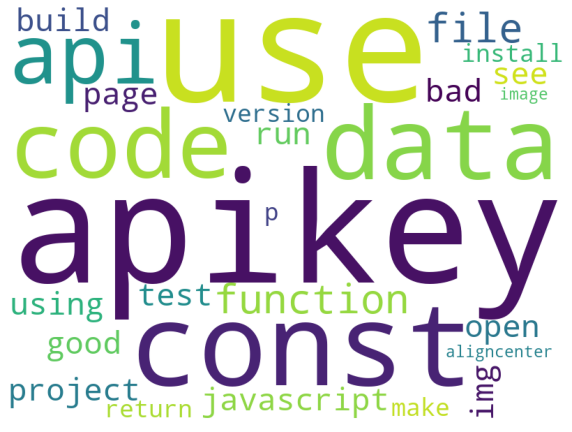

In [33]:
wordcloud_top(word_counts, 'all_words')

 ********************* Language : JavaScript *********************


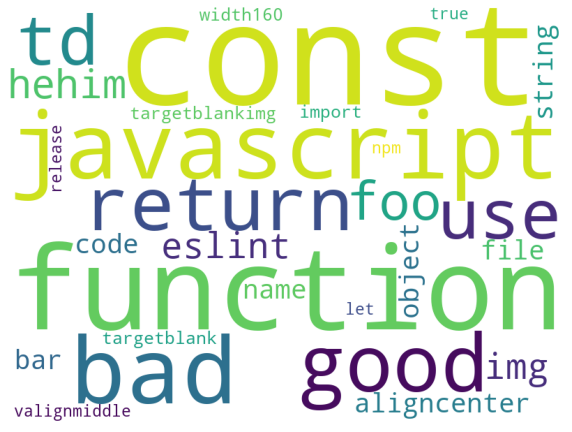

 
 ********************* Language : Python *********************


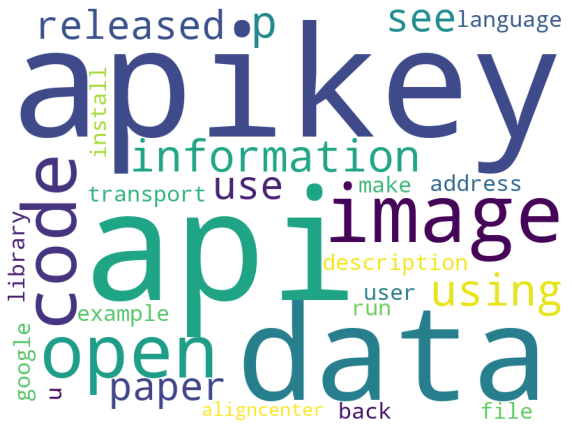

 
 ********************* Language : Java *********************


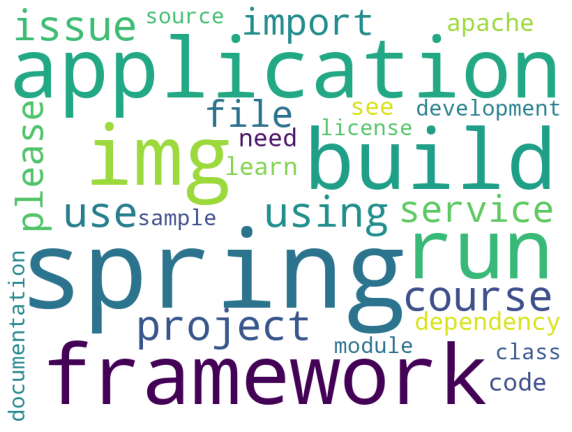

 
 ********************* Language : C++ *********************


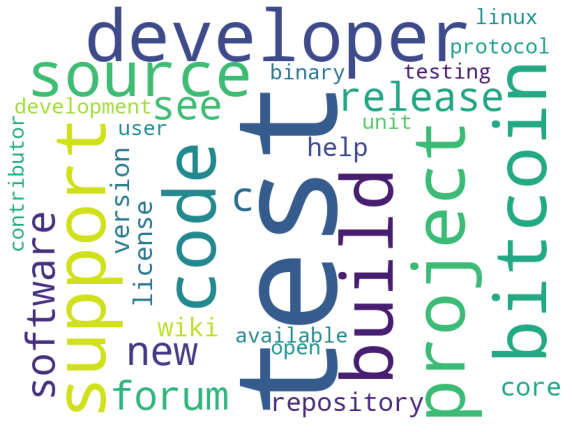

 
 ********************* Language : Ruby *********************


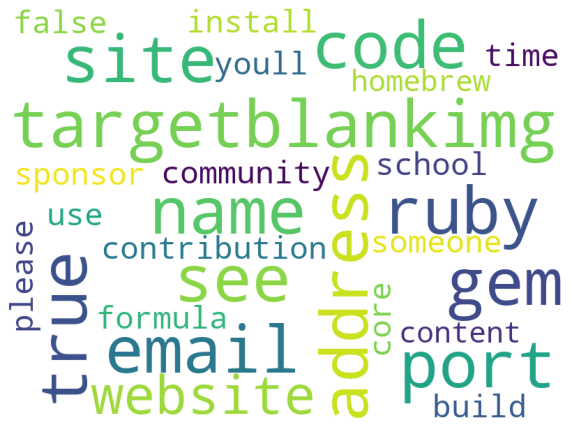

 
 ********************* Language : HTML *********************


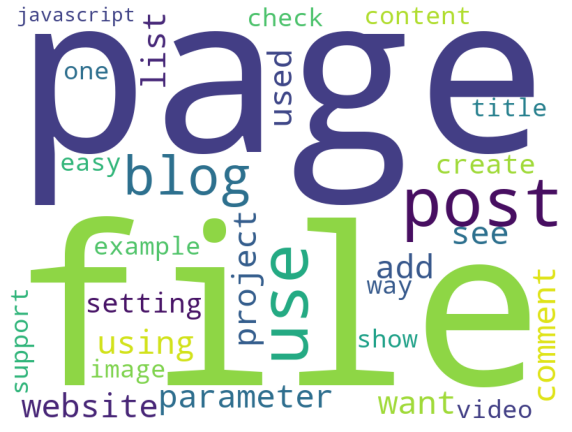

 
 ********************* Language : Go *********************


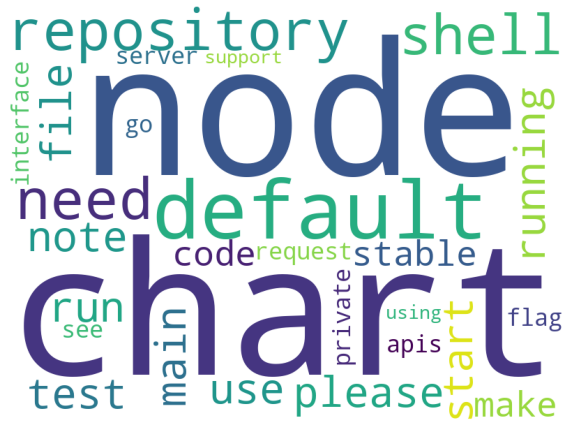

 
 ********************* Language : TypeScript *********************


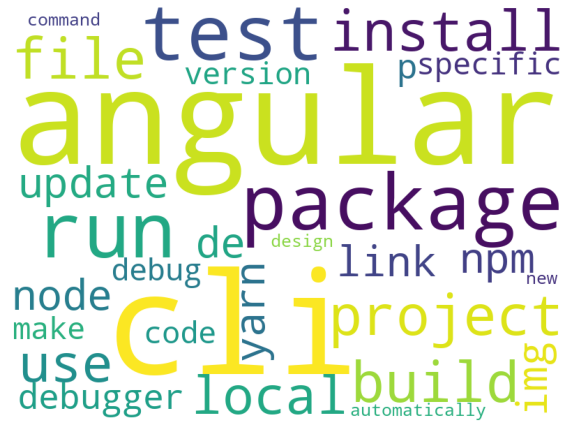

 
 ********************* Language : C *********************


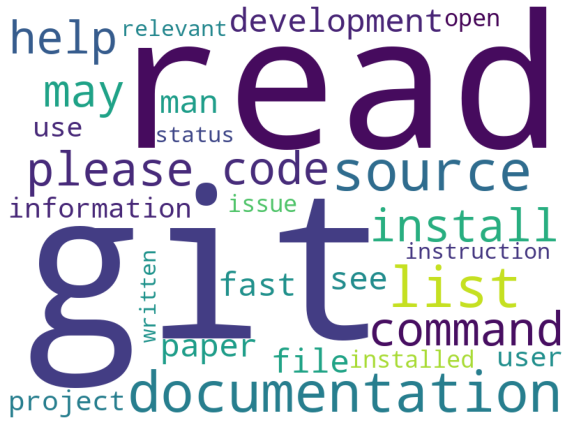

 
 ********************* Language : Vue *********************


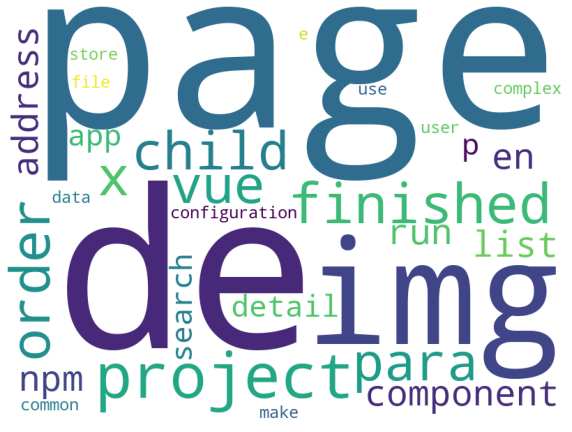

 
 ********************* Language : Shell *********************


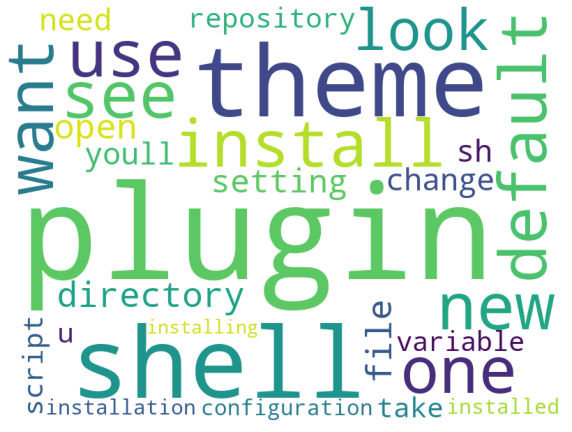

 
 ********************* Language : CSS *********************


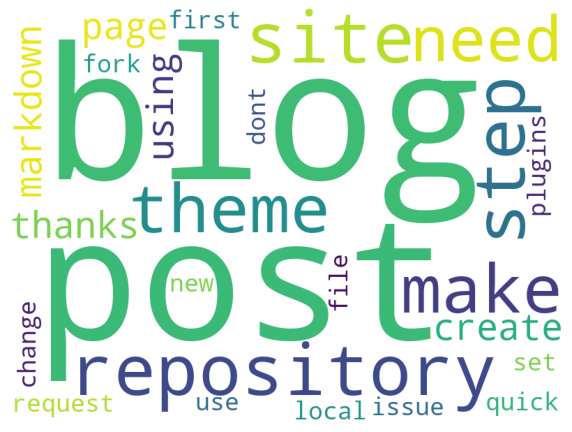

 
 ********************* Language : PHP *********************


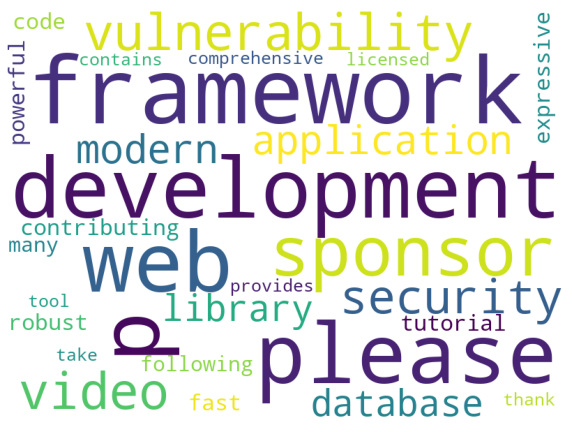

 
 ********************* Language : Kotlin *********************


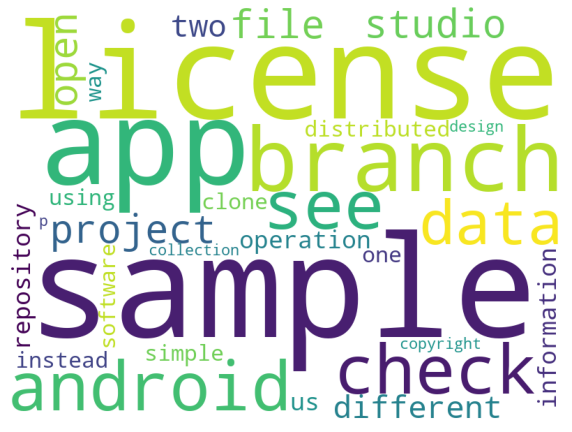

 
 ********************* Language : all_words *********************


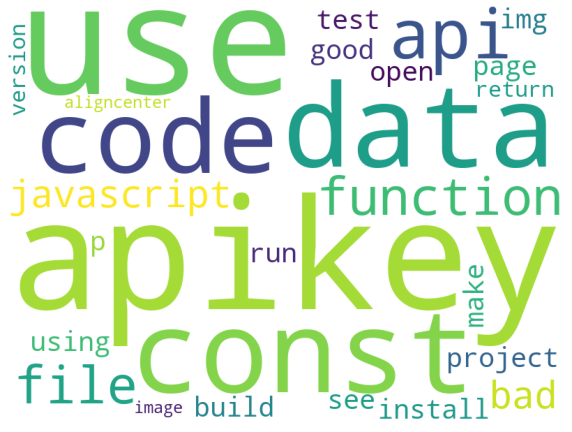

In [34]:
for col in word_counts.columns:
    print (f' ********************* Language : {col} *********************')
    wordcloud_top(word_counts, col)
    print(' ')

**- What does the distribution of IDFs look like for the most common words?**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
# # our 3 example documents
# documents = {
#     'news': 'Codeup announced last thursday that they just launched a new data science program. It is 18 weeks long.',
#     'description': 'Codeup\'s data science program teaches hands on skills using Python and pandas.',
#     'context': 'Codeup\'s data science program was created in response to a percieved lack of data science talent, and growing demand.'
# }
# print(documents)

# print('\nCleaning and lemmatizing...\n')

# documents = {topic: prep.lemmatize(prep.basic_clean(documents[topic])) for topic in documents}



In [37]:
# documents

In [38]:
# # A simple way to calculate idf for demonstration. Note that this
# # function relies on the globally defined documents variable.
# def idf(word):
#     n_occurences = sum([1 for doc in documents.values() if word in doc])
#     return len(documents) / n_occurences

# # Get a list of the unique words
# unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# # put the unique words into a data frame
# (pd.DataFrame(dict(word=unique_words))
#  # calculate the idf for each word
#  .assign(idf=lambda df: df.word.apply(idf))
#  # sort the data for presentation purposes
#  .set_index('word')
#  .sort_values(by='idf', ascending=False)
#  .head(5))

In [39]:
# # Get a list of the unique words
# pd.Series(' '.join(documents.values()).split()).unique()

In [40]:
#len(documents)

In [41]:
len(join_text)

15

In [42]:
join_text.pop("all_words")

'p aligncentera targetblankimg width400ap p aligncenter altbuild statusa alttotal downloadsa altlatest stable versiona altlicensea p laravel laravel web application framework expressive elegant syntax believe development must enjoyable creative experience truly fulfilling laravel take pain development easing common task used many web project simple fast routing powerful dependency injection multiple backends storage expressive intuitive database database agnostic schema robust background job realtime event laravel accessible powerful provides tool required large robust application learning laravel laravel extensive thorough video tutorial library modern web application framework making breeze get started framework dont feel like reading help laracasts contains 1500 video tutorial range topic including laravel modern php unit testing javascript boost skill digging comprehensive video library laravel sponsor would like extend thanks following sponsor funding laravel development intereste

In [43]:
join_text.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'Ruby', 'HTML', 'Go', 'TypeScript', 'C', 'Vue', 'Shell', 'CSS', 'PHP', 'Kotlin'])

In [44]:
def idf(word):
    n_occurences = sum([1 for doc in join_text.values() if word in doc])
    return len(join_text) / n_occurences

In [45]:
# Get a list of the unique words
unique_words = pd.Series(' '.join(join_text.values()).split()).unique()

In [46]:
unique_words

array(['build', 'devdependency', 'npm', ..., 'asf', 'agreement',
       'ownership'], dtype=object)

In [47]:
len(unique_words)

9990

In [50]:
#let's check a single word
idf('build')

1.1666666666666667

In [52]:
n_occurences = sum([1 for doc in join_text.values() if 'build' in doc])
len(join_text) / n_occurences

1.1666666666666667

In [53]:
#  how many texts  the word is in 
n_occurences

12

In [54]:
#total of texts 
len(join_text)

14

In [55]:
train

repo    language  \
39                     laravel/laravel         PHP   
66   jakevdp/PythonDataScienceHandbook      Python   
58                    pjreddie/darknet           C   
34                     macrozheng/mall        Java   
120  springframeworkguru/spring5webapp        Java   
..                                 ...         ...   
26        PanJiaChen/vue-element-admin         Vue   
97                   PX4/PX4-Autopilot         C++   
73    spring-projects/spring-petclinic        Java   
20               kubernetes/kubernetes          Go   
82                 angular/angular-cli  TypeScript   

                                       readme_contents  \
39   <p align="center"><a href="https://laravel.com...   
66   # Python Data Science Handbook\n\n[![Binder](h...   
58   ![Darknet Logo](http://pjreddie.com/media/file...   
34   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
120  # Spring Framework 5: Beginner to Guru\n\nThis...   
..                                                 ...   
26   <p align="center">\n  <img width="320" src="ht...   
97   # PX4 Drone Autopilot\n\n[![Releases](https://...   
73   # Spring PetClinic Sample Application [![Build...   
20   # Kubernetes (K8s)\n\n[![GoPkg Widget]][GoPkg]...   
82   <!--\n  BEFORE UPDATING THIS FILE, READ THIS.\...   

                                                 clean  \
39   p aligncentera targetblankimg width400ap p ali...   
66   python data science handbook repository contai...   
58   darknet darknet darknet open source neural net...   
34   mall p hrefimg alta hrefimg alta alta altsprin...   
120  spring framework 5 beginner guru repository ex...   
..                                                 ...   
26   p aligncenter img width320 p p aligncenter img...   
97   px4 drone autopilot nuttx sitl repository hold...   
73   spring petclinic sample application build unde...   
20   kubernetes k8s gopkg widgetgopkg cii best img ...   
82   updating file read file automatically generate...   

                                               stemmed  \
39   p aligncentera targetblankimg width400ap p ali...   
66   python data scienc handbook repositori contain...   
58   darknet darknet darknet open sourc neural netw...   
34   mall p hrefimg alta hrefimg alta alta altsprin...   
120  spring framework 5 beginn guru repositori exam...   
..                                                 ...   
26   p aligncent img width320 p p aligncent img alt...   
97   px4 drone autopilot nuttx sitl repositori hold...   
73   spring petclin sampl applic build understand s...   
20   kubernet k8 gopkg widgetgopkg cii best img wid...   
82   updat file read file automat gener releas impo...   

                                            lemmatized  
39   p aligncentera targetblankimg width400ap p ali...  
66   python data science handbook repository contai...  
58   darknet darknet darknet open source neural net...  
34   mall p hrefimg alta hrefimg alta alta altsprin...  
120  spring framework 5 beginner guru repository ex...  
..                                                 ...  
26   p aligncenter img width320 p p aligncenter img...  
97   px4 drone autopilot nuttx sitl repository hold...  
73   spring petclinic sample application build unde...  
20   kubernetes k8s gopkg widgetgopkg cii best img ...  
82   updating file read file automatically generate...  

[70 rows x 6 columns]

In [56]:
# put the unique words into a data frame
un_df =(pd.DataFrame(dict(word=unique_words))

 # calculate the idf for each word
.assign(idf=lambda train: train.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False))

In [57]:
un_df

idf
word              
nicolas       14.0
udp           14.0
transmission  14.0
tcpudp        14.0
udpvoip       14.0
...            ...
lo             1.0
hi             1.0
un             1.0
l              1.0
ner            1.0

[9990 rows x 1 columns]

In [59]:
#these are the words tht are only in one type of language text
un_df[un_df.idf==14]

idf
word                          
nicolas                   14.0
udp                       14.0
transmission              14.0
tcpudp                    14.0
udpvoip                   14.0
...                        ...
unused                    14.0
considered                14.0
138variablesnounusedvars  14.0
writeonly                 14.0
notdeepequal              14.0

[6868 rows x 1 columns]

In [60]:
len(un_df[un_df.idf==15])

0

In [61]:
len(un_df)

9990

In [62]:
#we can see
len(un_df[un_df.idf==14]) /len(un_df)

0.6874874874874874

In [63]:
#almost 68 % of the unique words are in one language text

**- Does the length of the README vary by programming language?**

In [64]:
train['readme_length'] = train.lemmatized.apply(len)

In [65]:
train.head()

repo language  \
39                     laravel/laravel      PHP   
66   jakevdp/PythonDataScienceHandbook   Python   
58                    pjreddie/darknet        C   
34                     macrozheng/mall     Java   
120  springframeworkguru/spring5webapp     Java   

                                       readme_contents  \
39   <p align="center"><a href="https://laravel.com...   
66   # Python Data Science Handbook\n\n[![Binder](h...   
58   ![Darknet Logo](http://pjreddie.com/media/file...   
34   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
120  # Spring Framework 5: Beginner to Guru\n\nThis...   

                                                 clean  \
39   p aligncentera targetblankimg width400ap p ali...   
66   python data science handbook repository contai...   
58   darknet darknet darknet open source neural net...   
34   mall p hrefimg alta hrefimg alta alta altsprin...   
120  spring framework 5 beginner guru repository ex...   

                                               stemmed  \
39   p aligncentera targetblankimg width400ap p ali...   
66   python data scienc handbook repositori contain...   
58   darknet darknet darknet open sourc neural netw...   
34   mall p hrefimg alta hrefimg alta alta altsprin...   
120  spring framework 5 beginn guru repositori exam...   

                                            lemmatized  readme_length  
39   p aligncentera targetblankimg width400ap p ali...           1550  
66   python data science handbook repository contai...           1478  
58   darknet darknet darknet open source neural net...            850  
34   mall p hrefimg alta hrefimg alta alta altsprin...           1217  
120  spring framework 5 beginner guru repository ex...           2798

In [66]:
train.groupby('language').readme_length.mean()


language
C             1169.666667
C++           2117.200000
CSS           3836.000000
Go            7291.000000
HTML          3324.000000
Java          2726.375000
JavaScript    7674.411765
Kotlin        2802.000000
PHP           1550.000000
Python        9157.857143
Ruby          1655.500000
Shell         3423.000000
TypeScript    3392.000000
Vue           5824.500000
Name: readme_length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

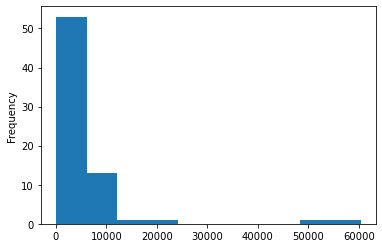

In [67]:
train.readme_length.plot.hist()

In [68]:
train['word_count'] = train.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

In [69]:
train.head()

repo language  \
39                     laravel/laravel      PHP   
66   jakevdp/PythonDataScienceHandbook   Python   
58                    pjreddie/darknet        C   
34                     macrozheng/mall     Java   
120  springframeworkguru/spring5webapp     Java   

                                       readme_contents  \
39   <p align="center"><a href="https://laravel.com...   
66   # Python Data Science Handbook\n\n[![Binder](h...   
58   ![Darknet Logo](http://pjreddie.com/media/file...   
34   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
120  # Spring Framework 5: Beginner to Guru\n\nThis...   

                                                 clean  \
39   p aligncentera targetblankimg width400ap p ali...   
66   python data science handbook repository contai...   
58   darknet darknet darknet open source neural net...   
34   mall p hrefimg alta hrefimg alta alta altsprin...   
120  spring framework 5 beginner guru repository ex...   

                                               stemmed  \
39   p aligncentera targetblankimg width400ap p ali...   
66   python data scienc handbook repositori contain...   
58   darknet darknet darknet open sourc neural netw...   
34   mall p hrefimg alta hrefimg alta alta altsprin...   
120  spring framework 5 beginn guru repositori exam...   

                                            lemmatized  readme_length  \
39   p aligncentera targetblankimg width400ap p ali...           1550   
66   python data science handbook repository contai...           1478   
58   darknet darknet darknet open source neural net...            850   
34   mall p hrefimg alta hrefimg alta alta altsprin...           1217   
120  spring framework 5 beginner guru repository ex...           2798   

     word_count  
39          189  
66          192  
58          106  
34          137  
120         405

<Figure size 1080x720 with 0 Axes>

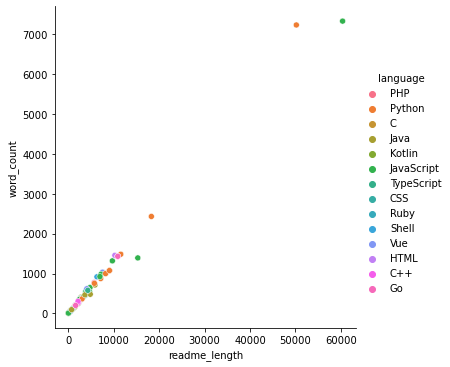

In [70]:
plt.figure(figsize= (15,10))
sns.relplot(data=train, y='word_count', x='readme_length', hue='language')
#plt.rc('figure',figsize=(10,10))
plt.show()

In [71]:
train.groupby('language').word_count.mean()

language
C              138.000000
C++            274.600000
CSS            554.000000
Go             959.250000
HTML           467.250000
Java           323.625000
JavaScript     935.823529
Kotlin         370.000000
PHP            189.000000
Python        1217.928571
Ruby           204.000000
Shell          487.000000
TypeScript     436.500000
Vue            826.500000
Name: word_count, dtype: float64

In [72]:
train.groupby('language').word_count.median()

language
C              106.0
C++            293.0
CSS            554.0
Go            1103.0
HTML           201.5
Java           283.5
JavaScript     522.0
Kotlin         370.0
PHP            189.0
Python         815.0
Ruby           163.0
Shell          487.0
TypeScript     460.0
Vue            826.5
Name: word_count, dtype: float64

### Do different programming languages use a different number of unique words?

In [73]:
word_counts.head()

JavaScript  Python  Java  C++  Ruby  HTML  Go  TypeScript  C  Vue  \
const              265       0     0    0     0     0   0           1  0    1   
function           223       2     0    0     0     0   0           0  0    4   
javascript         208       2     0    1     0     8   2           0  0    0   
bad                201       5     0    0     0     0   0           0  0    0   
good               186       5     3    0     2     0   0           0  2    3   

            Shell  CSS  PHP  Kotlin  all_words  
const           0    0    0       0        267  
function        1    0    0       0        230  
javascript      0    0    1       0        222  
bad             0    0    0       0        206  
good            1    0    0       0        202

In [74]:
word_counts[word_counts.all_words ==1]

JavaScript  Python  Java  C++  Ruby  HTML  Go  \
billabong                         1       0     0    0     0     0   0   
241accessorsnotrequired           1       0     0    0     0     0   0   
axel                              1       0     0    0     0     0   0   
startquickstart                   1       0     0    0     0     0   0   
itemslength                       1       0     0    0     0     0   0   
...                             ...     ...   ...  ...   ...   ...  ..   
bootstrapesmjsmap                 1       0     0    0     0     0   0   
attachment                        1       0     0    0     0     0   0   
altfont                           1       0     0    0     0     0   0   
inappropriately                   1       0     0    0     0     0   0   
outer                             1       0     0    0     0     0   0   

                         TypeScript  C  Vue  Shell  CSS  PHP  Kotlin  \
billabong                         0  0    0      0    0    0       0   
241accessorsnotrequired           0  0    0      0    0    0       0   
axel                              0  0    0      0    0    0       0   
startquickstart                   0  0    0      0    0    0       0   
itemslength                       0  0    0      0    0    0       0   
...                             ... ..  ...    ...  ...  ...     ...   
bootstrapesmjsmap                 0  0    0      0    0    0       0   
attachment                        0  0    0      0    0    0       0   
altfont                           0  0    0      0    0    0       0   
inappropriately                   0  0    0      0    0    0       0   
outer                             0  0    0      0    0    0       0   

                         all_words  
billabong                        1  
241accessorsnotrequired          1  
axel                             1  
startquickstart                  1  
itemslength                      1  
...                            ...  
bootstrapesmjsmap                1  
attachment                       1  
altfont                          1  
inappropriately                  1  
outer                            1  

[2139 rows x 15 columns]

In [75]:
word_counts[word_counts.all_words ==1].sum()

JavaScript    2139
Python           0
Java             0
C++              0
Ruby             0
HTML             0
Go               0
TypeScript       0
C                0
Vue              0
Shell            0
CSS              0
PHP              0
Kotlin           0
all_words     2139
dtype: int64

In [76]:
# Get a list of the unique words per language
unique_words

array(['build', 'devdependency', 'npm', ..., 'asf', 'agreement',
       'ownership'], dtype=object)

In [77]:
uniq_words={}
# Get a list of the unique words
for key in join_text:
    uniq_words [key] =  list(pd.Series(join_text[key].split()).unique())
    


In [78]:
join_text['JavaScript']

'build devdependency npm boilerplate professional frontend template building fast robust adaptable web apps site project product 10 year iterative development community knowledge impose specific development philosophy framework youre free architect code way want homepage source twitter quick start choose one following option download latest stable release zip file snapshot dist folder window mac file manager linux unzipping folder output folder named something like command line need create folder unzip content folder bash mkdir unzip clone git repo git clone checkout tagged youd like use dist folder represents latest version project end user install npm install yarn add resulting folder represents latest version project end user depending want use want use may copy paste content folder project directory using new project instantly fetch latest npm published package version available npm npx npm init yarn create without install dependency running following npx command installs latest ve

In [79]:
uniq_words

{'JavaScript': ['build',
  'devdependency',
  'npm',
  'boilerplate',
  'professional',
  'frontend',
  'template',
  'building',
  'fast',
  'robust',
  'adaptable',
  'web',
  'apps',
  'site',
  'project',
  'product',
  '10',
  'year',
  'iterative',
  'development',
  'community',
  'knowledge',
  'impose',
  'specific',
  'philosophy',
  'framework',
  'youre',
  'free',
  'architect',
  'code',
  'way',
  'want',
  'homepage',
  'source',
  'twitter',
  'quick',
  'start',
  'choose',
  'one',
  'following',
  'option',
  'download',
  'latest',
  'stable',
  'release',
  'zip',
  'file',
  'snapshot',
  'dist',
  'folder',
  'window',
  'mac',
  'manager',
  'linux',
  'unzipping',
  'output',
  'named',
  'something',
  'like',
  'command',
  'line',
  'need',
  'create',
  'unzip',
  'content',
  'bash',
  'mkdir',
  'clone',
  'git',
  'repo',
  'checkout',
  'tagged',
  'youd',
  'use',
  'represents',
  'version',
  'end',
  'user',
  'install',
  'yarn',
  'add',
  'resul

In [80]:
len(uniq_words['JavaScript'])

4522

In [81]:
#vizualizacion most frequet words
def word_cloud (text):

    plt.figure(figsize=(10,10))
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

******************************UNIQUE WORDS FOR JavaScript ***************************** 


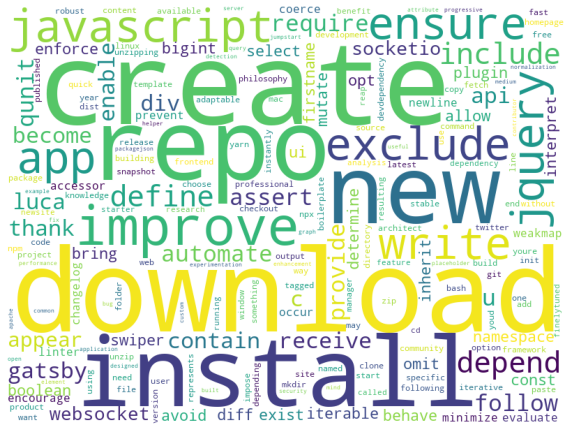

******************************UNIQUE WORDS FOR Python ***************************** 


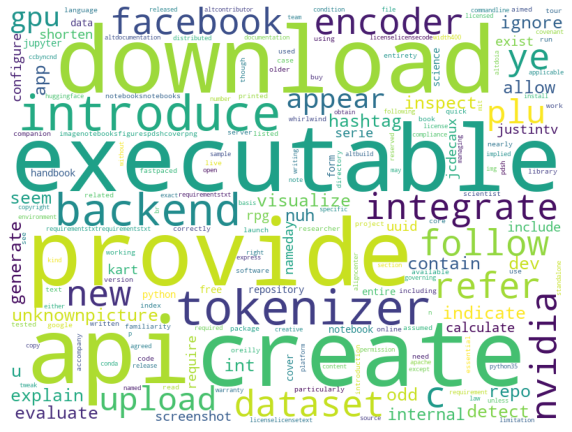

******************************UNIQUE WORDS FOR Java ***************************** 


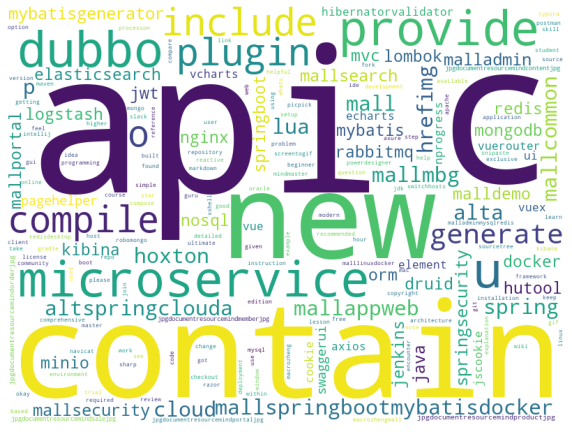

******************************UNIQUE WORDS FOR C++ ***************************** 


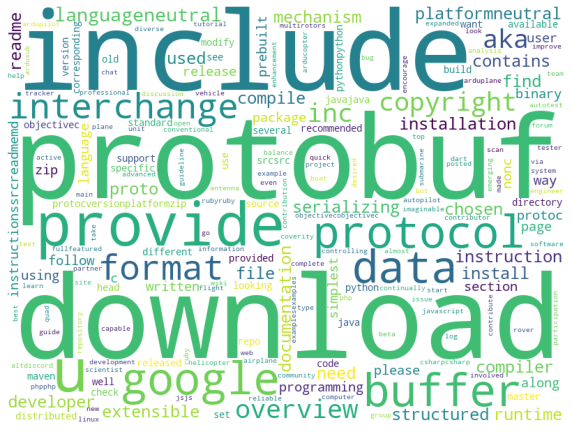

******************************UNIQUE WORDS FOR Ruby ***************************** 


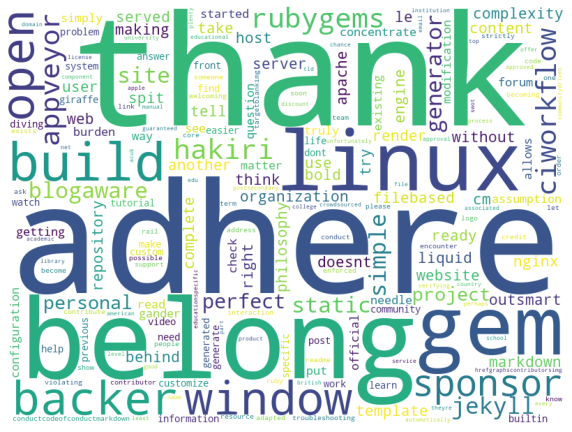

******************************UNIQUE WORDS FOR HTML ***************************** 


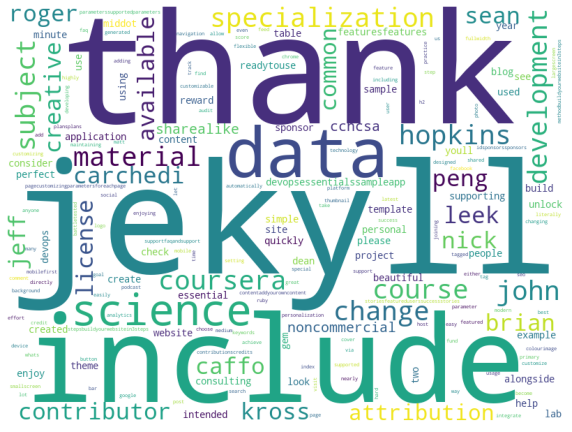

******************************UNIQUE WORDS FOR Go ***************************** 


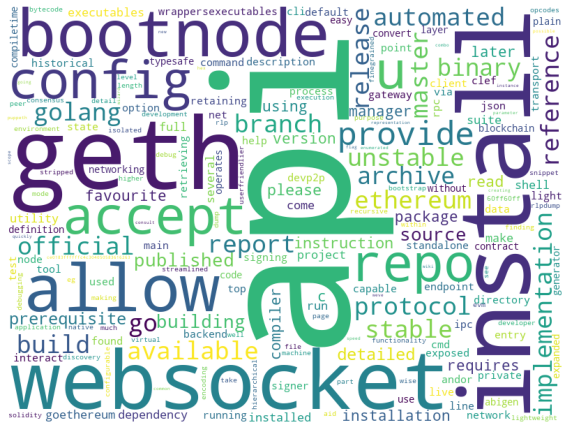

******************************UNIQUE WORDS FOR TypeScript ***************************** 


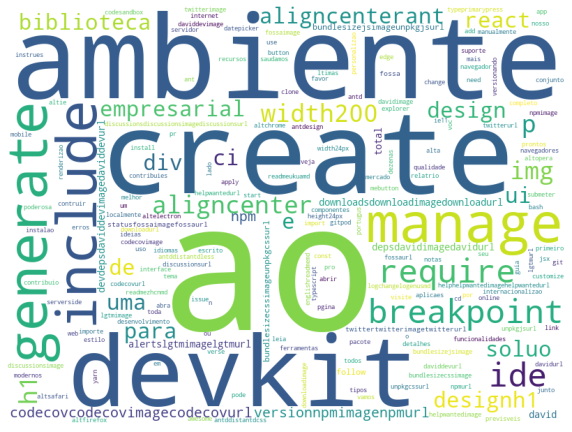

******************************UNIQUE WORDS FOR C ***************************** 


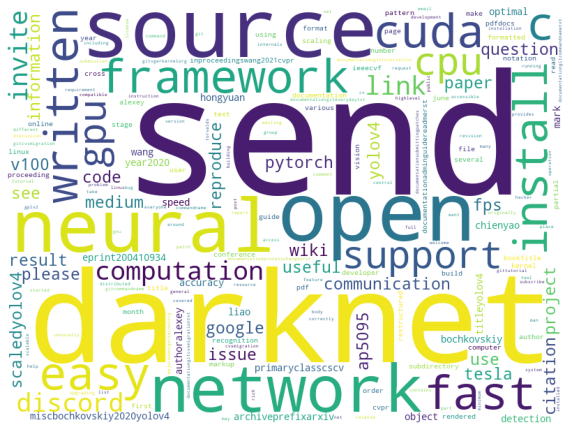

******************************UNIQUE WORDS FOR Vue ***************************** 


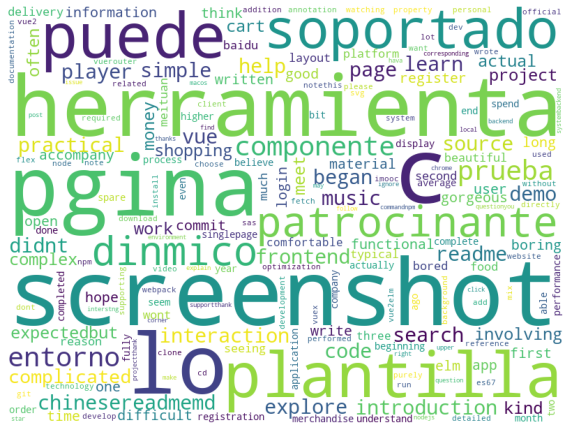

******************************UNIQUE WORDS FOR Shell ***************************** 


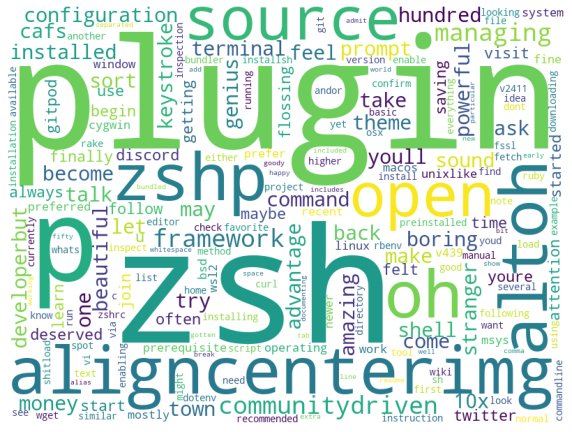

******************************UNIQUE WORDS FOR CSS ***************************** 


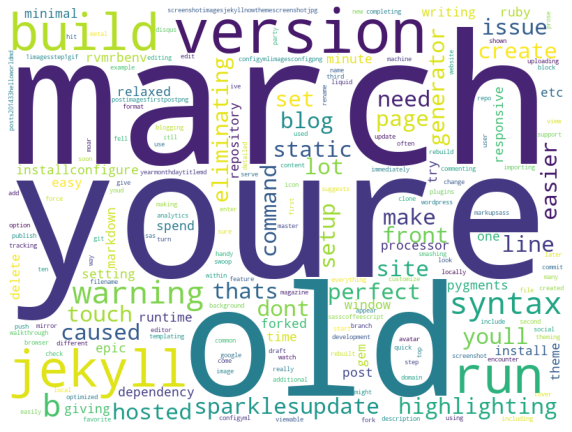

******************************UNIQUE WORDS FOR PHP ***************************** 


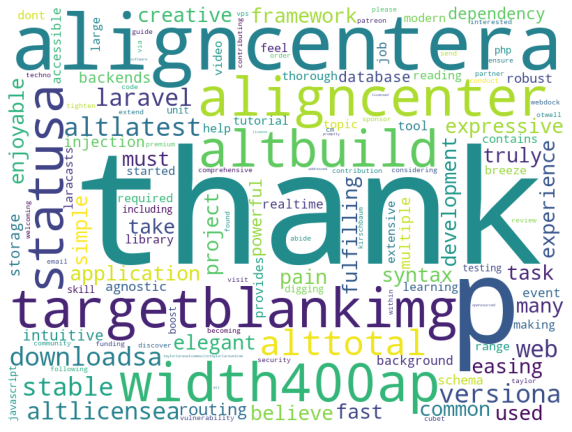

******************************UNIQUE WORDS FOR Kotlin ***************************** 


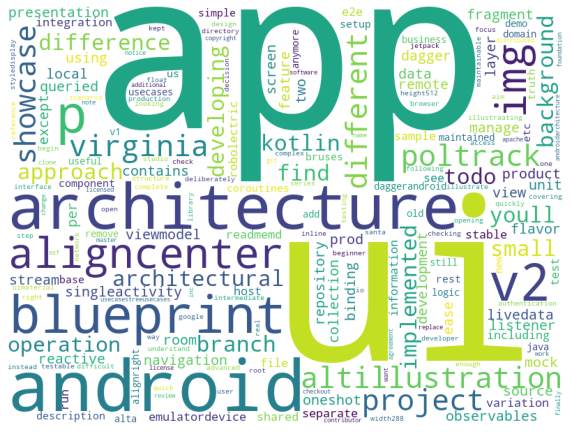

In [82]:
for key in uniq_words:    
    print(f'******************************UNIQUE WORDS FOR {key} ***************************** ')
    word_cloud (' '.join(uniq_words[key]))

In [83]:
len_uniq_df={}
for key in uniq_words:
    len_uniq_df[key] = len(uniq_words[key])
    

In [90]:
pd.DataFrame(len_uniq_df, index= ['unique_words']).T

unique_words
JavaScript          4522
Python              4422
Java                1069
C++                  568
Ruby                 497
HTML                 733
Go                   987
TypeScript           600
C                    269
Vue                  812
Shell                472
CSS                  313
PHP                  141
Kotlin               231

In [95]:
word_counts[word_counts.all_words == 1].sum()

JavaScript    2139
Python           0
Java             0
C++              0
Ruby             0
HTML             0
Go               0
TypeScript       0
C                0
Vue              0
Shell            0
CSS              0
PHP              0
Kotlin           0
all_words     2139
dtype: int64

In [85]:
string = 'statushttpsgithubcomh5bphtml5boilerplateworkflowsbuild20statusbadgesvghttpsgithubcomh5bphtml5boilerplateactionsqueryworkflow3a22buildstatus22branch3amaster licensehttpsimgshieldsiobadgelicensemitlightgreysvghttpsgithubcomh5bphtml5boilerplateblobmasterlicensetxt devdependency statushttpsdaviddmorgh5bphtml5boilerplatedevstatussvghttpsdaviddmorgh5bphtml5boilerplateinfodevdependencies npm downloadshttpsimgshieldsionpmdthtml5boilerplatesvghttpswwwnpmjscompackagehtml5boilerplate githubstarsimagehttpsimgshieldsiogithubstarsh5bphtml5boilerplatesvglabelgithub20starshttpsgithubcomh5bphtml5boilerplate html5 boilerplate professional frontend template building fast robust adaptable web apps site project product 10 year iterative development community knowledge impose specific development philosophy framework youre free architect code way want homepage httpshtml5boilerplatecomhttpshtml5boilerplatecom source httpsgithubcomh5bphtml5boilerplatehttpsgithubcomh5bphtml5boilerplate twitter h5bphttpstwittercomh5bp quick start choose one following option download latest stable  github github release html5boilerplatecomhttpshtml5boilerplatecom'

In [ ]:
prep.remove_stopwords(string, ['http'])

In [ ]:

import re
regexp = r'\w*github\w*'

re.sub(regexp, '', string)
